#  Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the Data

In [ ]:
train_df=pd.read_csv(r'/content/train.csv')
y_train=train_df['target']
df=pd.concat([train_df,pd.read_csv(r'/content/test.csv')])
train_df

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39206,2008-07-31,31,technician,single,secondary,no,0,yes,no,cellular,16,34,-1,0,NaN,no
39207,2009-07-31,59,admin.,married,primary,no,6187,no,no,cellular,114,4,-1,0,NaN,no
39208,2008-06-02,36,blue-collar,married,secondary,no,63,yes,no,NaN,56,8,-1,0,NaN,no
39209,2010-03-20,28,student,single,secondary,no,5916,no,no,cellular,93,5,-1,0,NaN,no


**Converting Last Contact Date Column to Month and Year**

In [ ]:
train_df['last contact year']=pd.DatetimeIndex(train_df['last contact date']).year
train_df['last contact month']=pd.DatetimeIndex(train_df['last contact date']).month
df['last contact year']=pd.DatetimeIndex(df['last contact date']).year
df['last contact month']=pd.DatetimeIndex(df['last contact date']).month
train_df.drop(columns=['last contact date'],inplace=True)
df.drop(columns=['last contact date'],inplace=True)

# **Exploratary Data Analysis**

***Column Names***

In [ ]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'target', 'last contact year', 'last contact month'],
      dtype='object')

In [ ]:
categorical_columns=['job', 'marital', 'education', 'default', 'housing', 'contact',
             'poutcome', 'target', 'last contact year', 'last contact month','loan']
numerical_columns=['age','balance','duration','campaign','pdays','previous']

**Function to find Outliers**

In [ ]:
def outliers(df,col):
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    return upper_limit,lower_limit

***Univariate Analysis***


In [ ]:
#Numerical Columns Analysis
train_df.describe()

,age,balance,duration,campaign,pdays,previous,last contact year,last contact month
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171,2009.000791,6.223993
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259,0.818415,2.614273
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000,2008.000000,1.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000,2008.000000,5.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000,2009.000000,6.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000,2010.000000,8.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000,2010.000000,12.000000


<Axes: xlabel='target'>

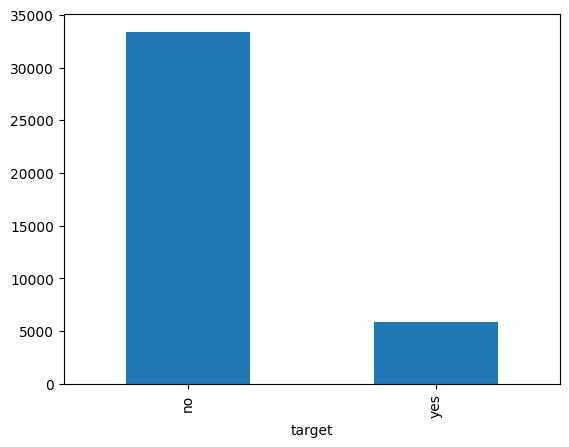

In [ ]:
#EDA on Target Column
train_df['target'].value_counts().plot(kind='bar')

Conclusion:-
The Dataset is imbalanced

EDA on Numerical Columns

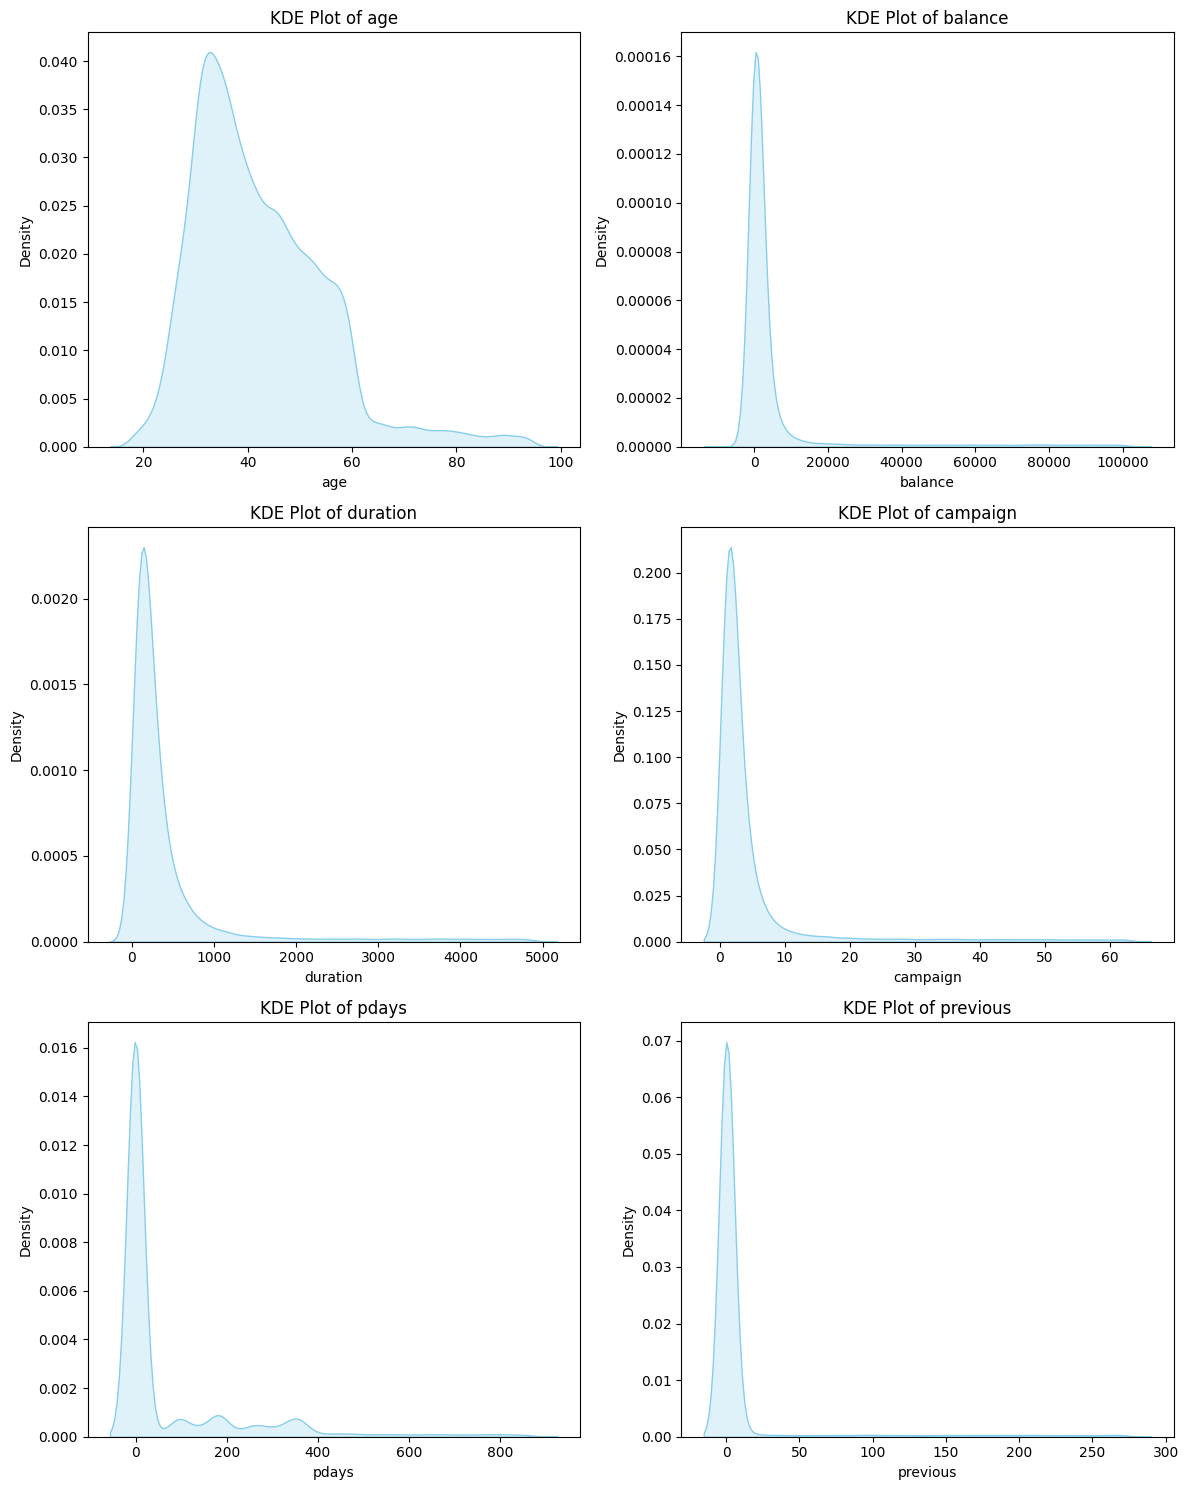

In [ ]:
#Distributions of All Numerical  Columns
# Define rows and columns for subplots
n_cols = 2  # Number of plots per row
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate the required number of rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))  # Adjust height to fit rows
axes = axes.flatten()  # Flatten the array for easier indexing

# Plot KDE for each column
for i, col in enumerate(numerical_columns):
    sns.kdeplot(df[col], ax=axes[i], color='skyblue', fill=True)
    axes[i].set_title(f"KDE Plot of {col}")
    axes[i].set_xlabel(col)

# Remove extra subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display
plt.tight_layout()
plt.show()

### Conclusions:-
- From the Above Observations, We can conclude that Age is Column is Normally Distributed whereas
Balance,Duration,Campaign,pdays,previous are highly skewed

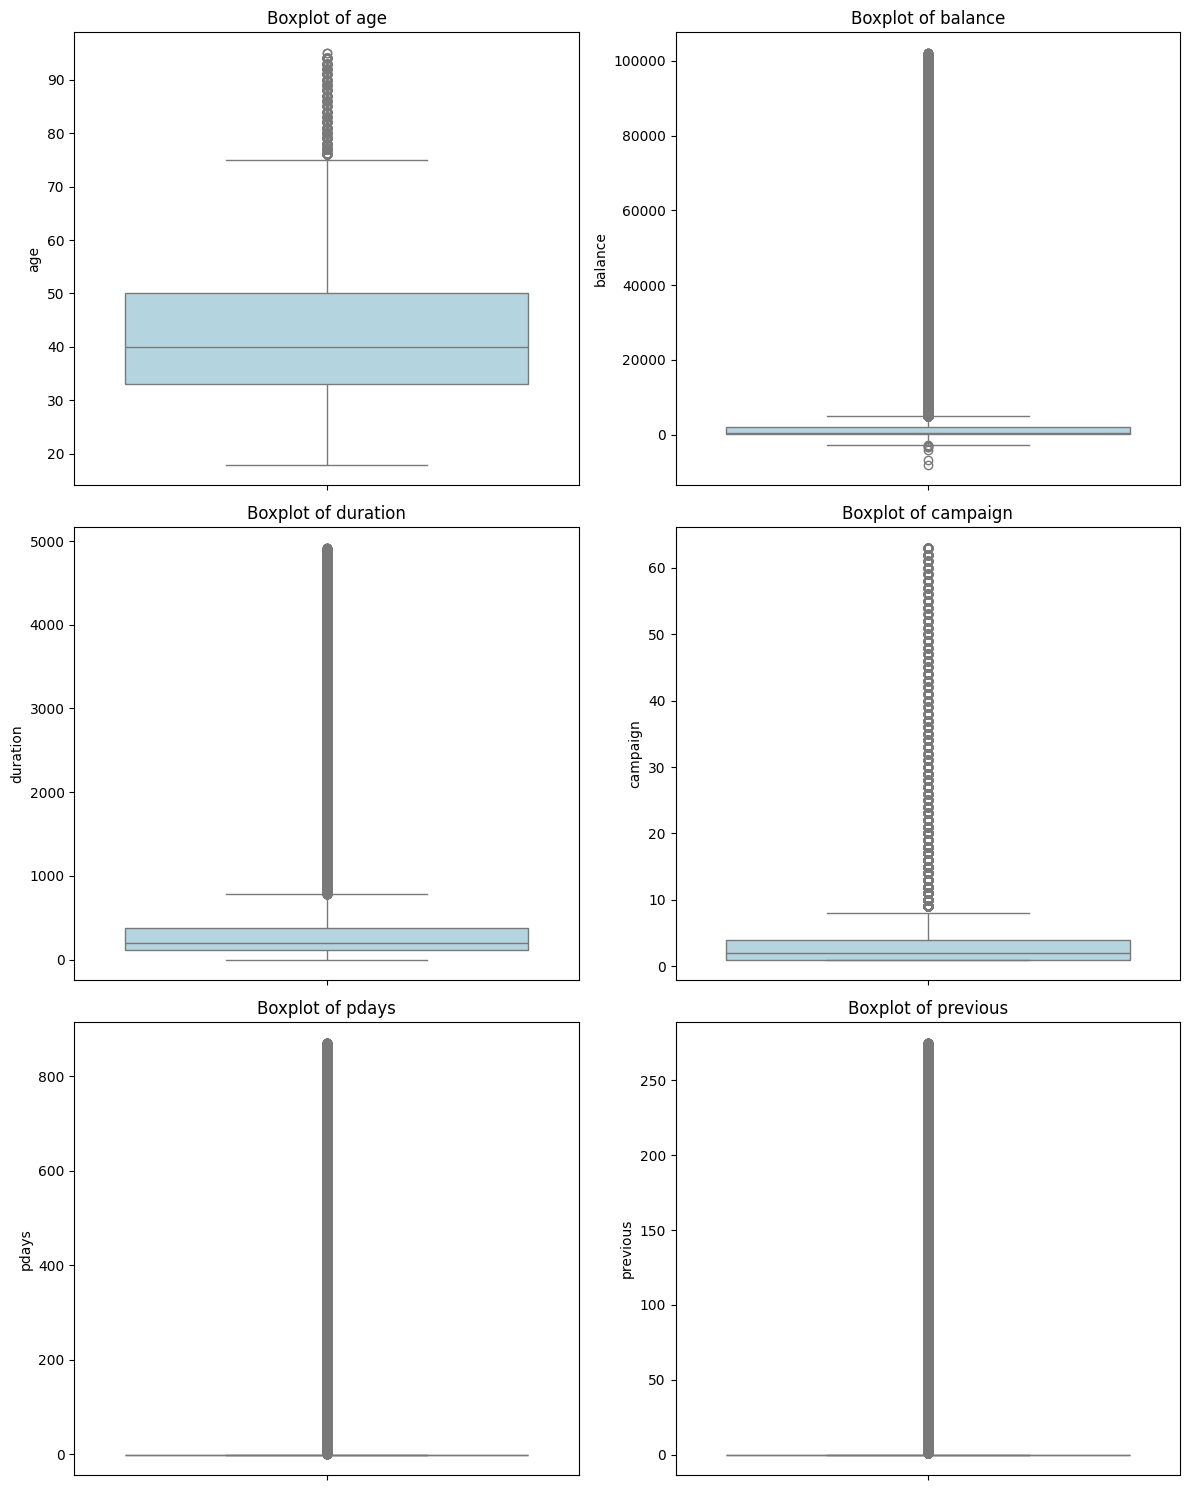

In [ ]:
#Boxplots of Numerical Columns to find Outliers
n_cols = 2
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate the required number of rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))  # Adjust height to fit rows
axes = axes.flatten()  # Flatten the array for easier indexing

# Plot boxplot for each column
for i, col in enumerate(numerical_columns):
    sns.boxplot(y=df[col], ax=axes[i], color='lightblue')
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('')

# Remove extra subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display
plt.tight_layout()
plt.show()

### Conclusions:-
- From the Above Observations, We can conclude that Age has some Outliers but
Balance,Duration,Campaign,pdays,previous have many much outliers

### Let's Analyse Categorical Data

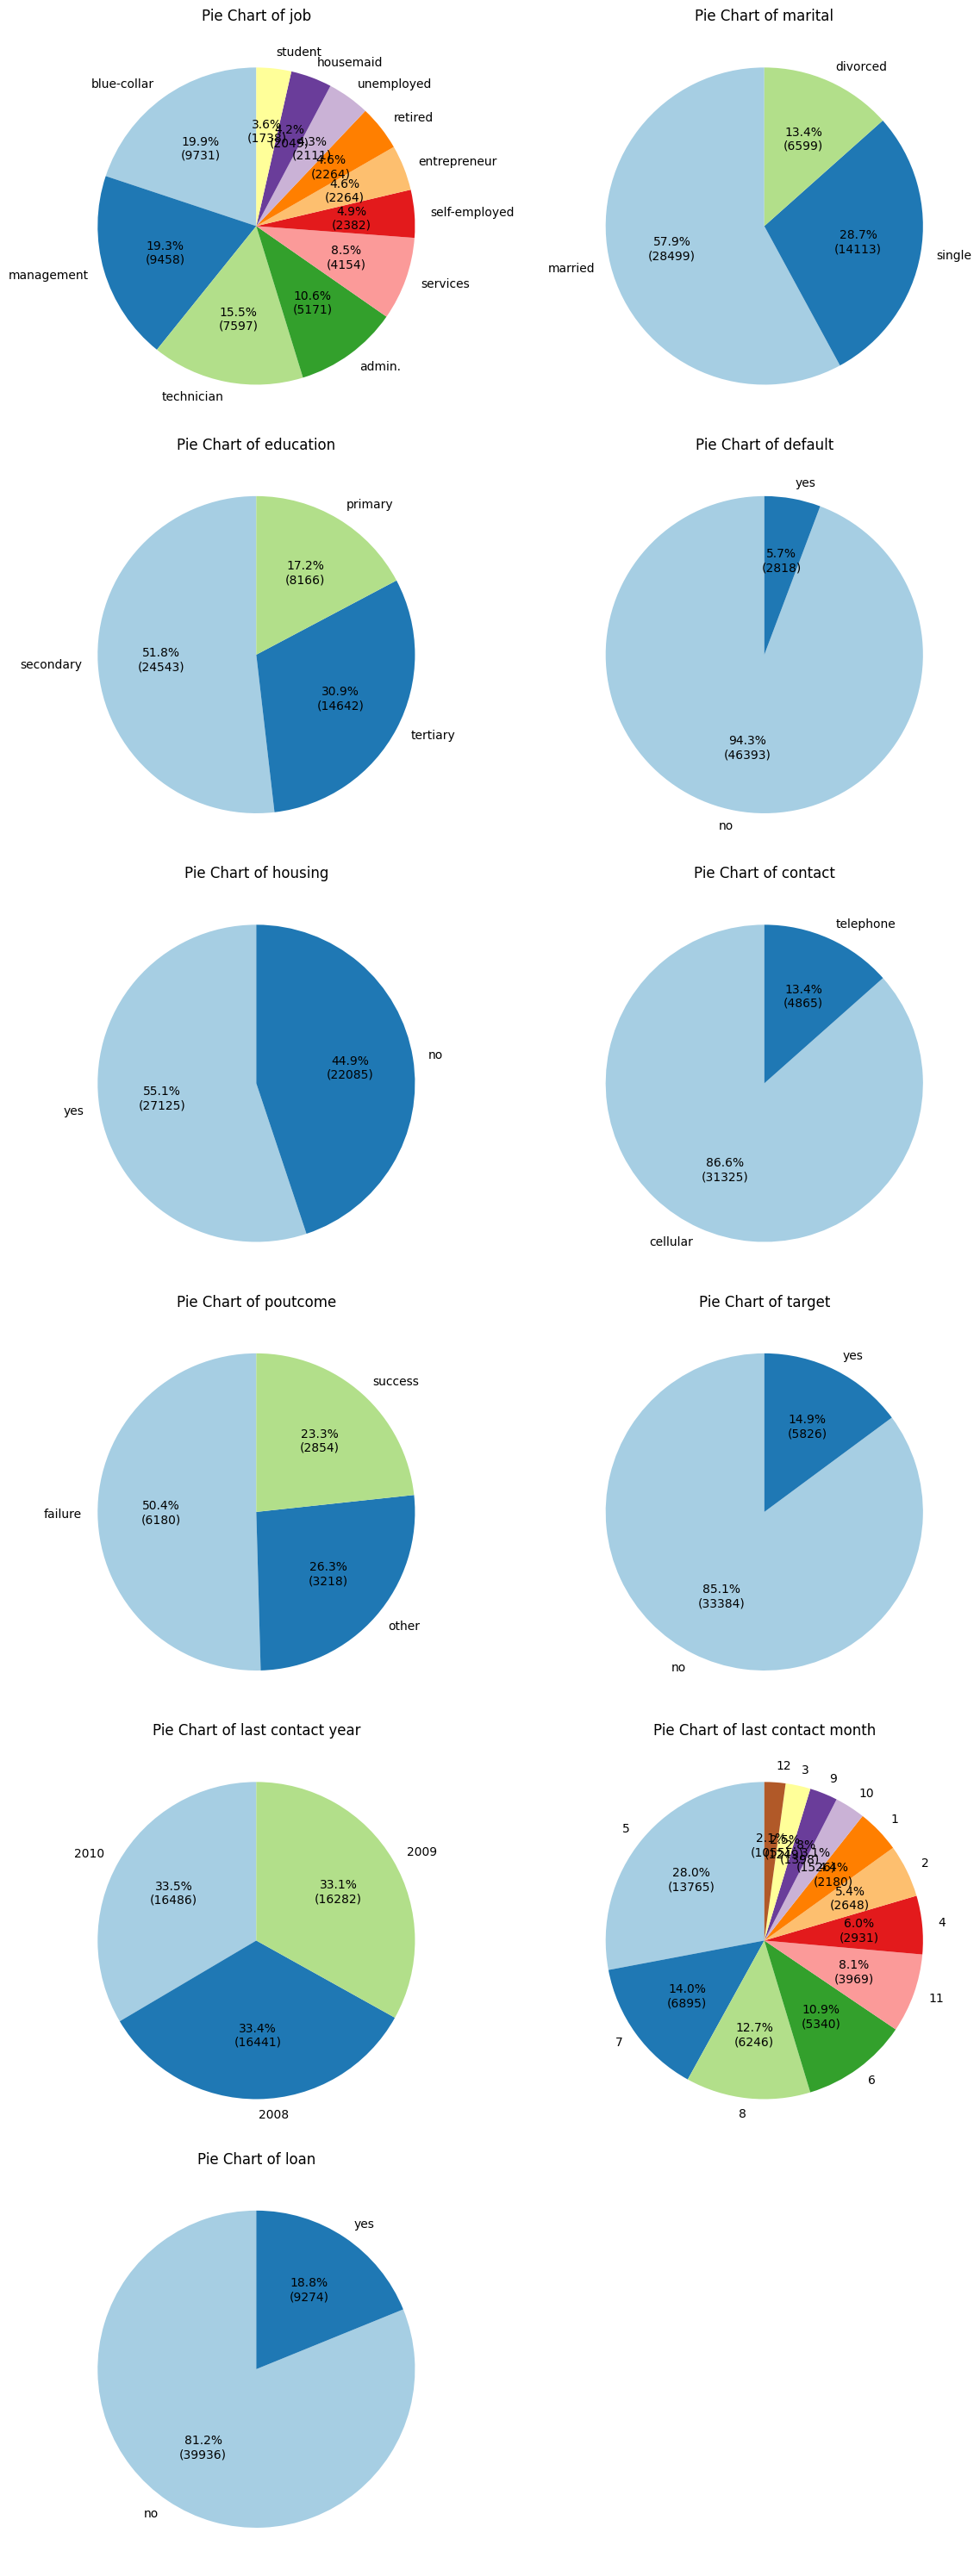

In [ ]:
n_cols = 2
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten()
for i, col in enumerate(categorical_columns):
    counts = df[col].value_counts()
    labels = counts.index
    sizes = counts.values
    axes[i].pie(sizes, labels=labels, autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100*sum(sizes))})", startangle=90, colors=plt.cm.Paired.colors)
    axes[i].set_title(f"Pie Chart of {col}")
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

#### Bivariate Analysis of Categorical Variables

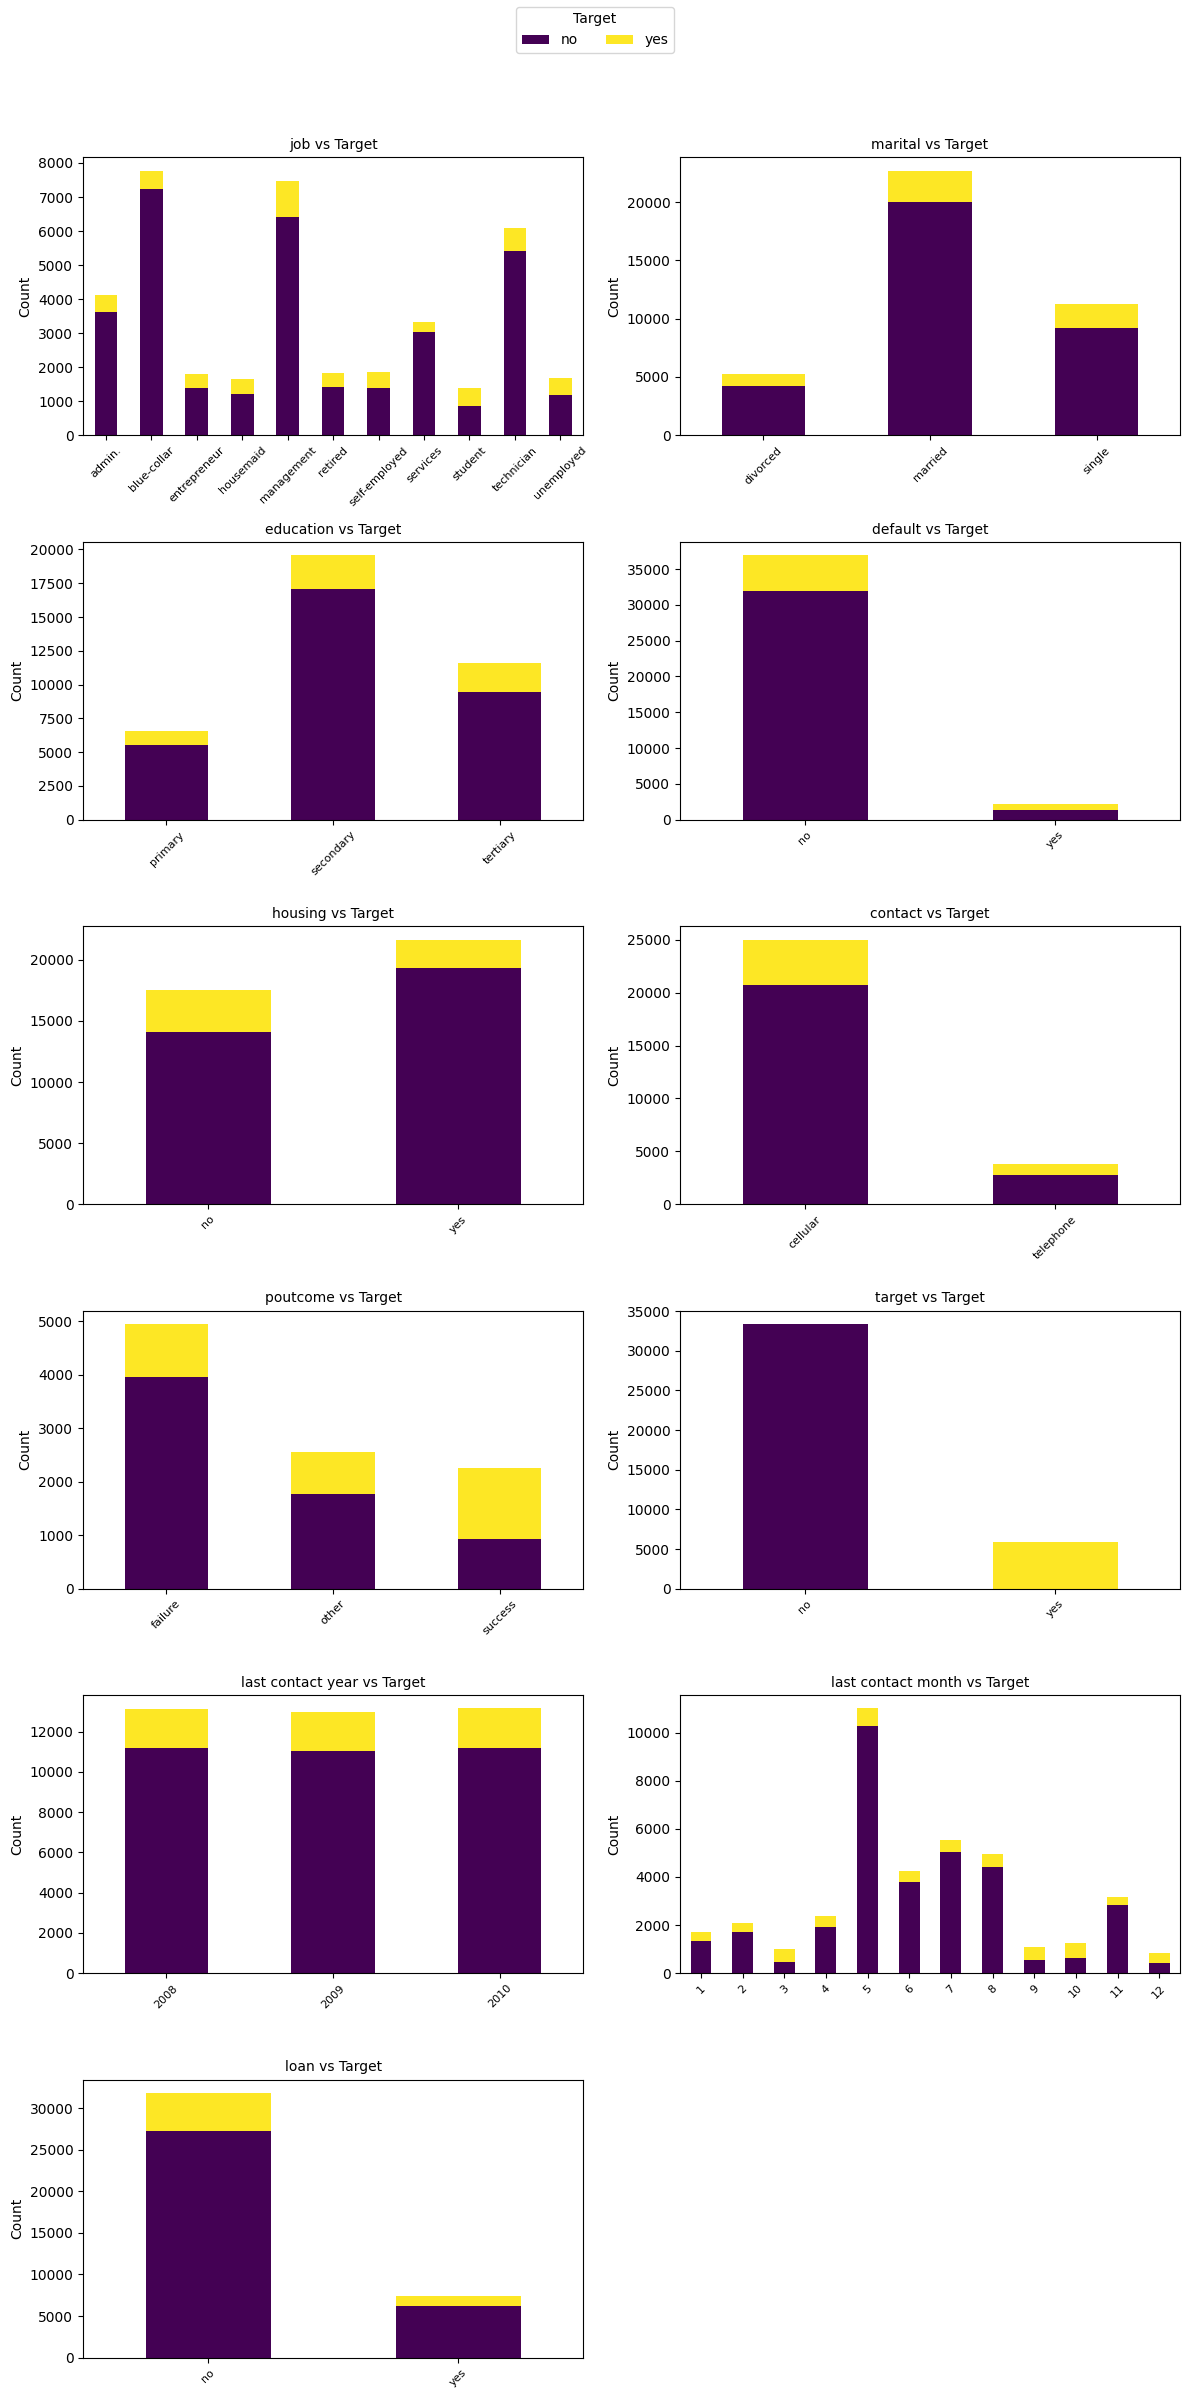

In [ ]:
num_columns = 2
num_rows = (len(categorical_columns) + num_columns - 1) // num_columns
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, num_rows * 4))
axes = axes.flatten()
for i, col in enumerate(categorical_columns):
    ct = pd.crosstab(train_df[col], train_df['target'])
    ct.plot(kind='bar', stacked=True, ax=axes[i], colormap='viridis', legend=False)
    axes[i].set_title(f'{col} vs Target', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)
for j in range(len(categorical_columns), len(axes)):
    axes[j].axis('off')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=5, title='Target')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Let's Analyse Null Values

In [ ]:
df.isna().sum()

,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
duration,0


In [ ]:
train_df.poutcome.isna().sum()/len(train_df.poutcome)*100

75.10902552855066

Conclusion:- 75% of the Values In poutcome are null

### Let's Handle Unknown Values in pdays,contact and poutcome

In [ ]:
train_df.loc[(train_df['pdays'] == -1) & (train_df['poutcome'].isna()), 'poutcome'].shape

(29446,)

In [ ]:
train_df.loc[(train_df['pdays'] == -1) & (train_df['poutcome'].isna()) & (train_df['contact'].isna()),'contact'].shape

(10283,)

In [ ]:
train_df.loc[train_df['pdays'] == -1,'pdays'].shape

(29446,)

### Analysis of Outliers in Numerical Columns

<Axes: xlabel='age'>

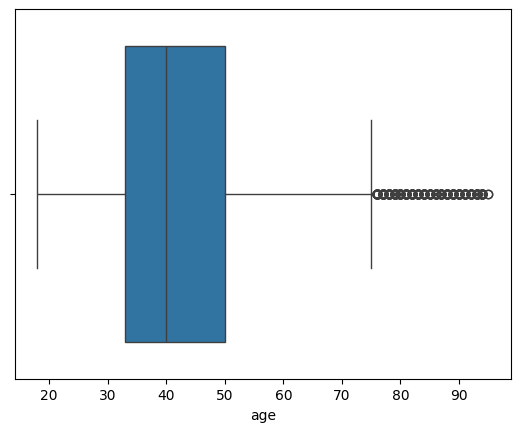

In [ ]:
sns.boxplot(data=train_df,x='age')


{'whiskers': [<matplotlib.lines.Line2D at 0x794f24fb6f50>,
 'caps': [<matplotlib.lines.Line2D at 0x794f24fb6e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x794f24fb7c40>],
 'medians': [<matplotlib.lines.Line2D at 0x794f29749030>],
 'fliers': [<matplotlib.lines.Line2D at 0x794f2974ba30>],
 'means': []}

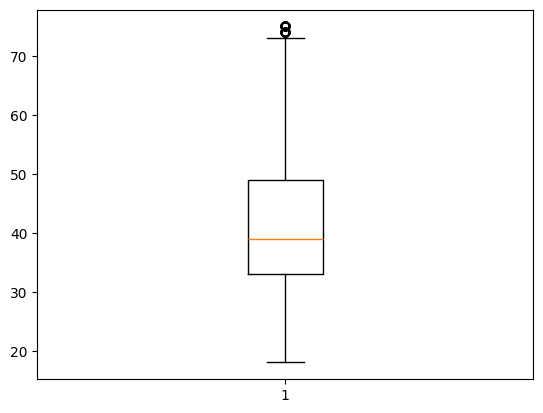

In [ ]:
upper,lower=outliers(train_df,'age')
plt.boxplot(train_df[(train_df['age']<=upper)&(train_df['age']>=lower)]['age'])

<Axes: xlabel='target', ylabel='age'>

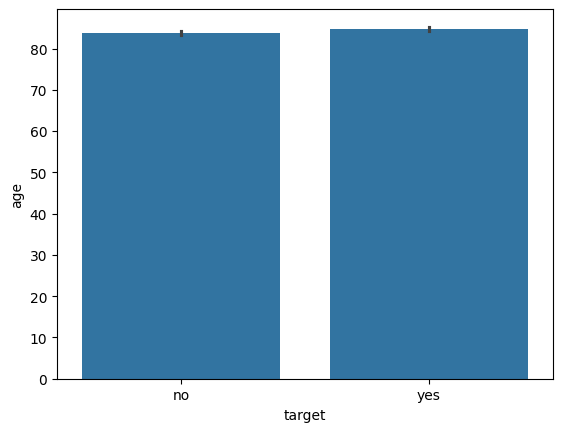

In [ ]:
sns.barplot(data=train_df[train_df['age']>upper], x='target', y='age')

***From this we can draw conclusion that age column can be trasferred to categorical and thus outliers would be handled***

In [ ]:
#Now analysing Balance Column
upper,lower=outliers(train_df,'balance')
upper,lower

(4928.0, -2800.0)

In [ ]:
#Balance Column Has many Negative Values
train_df[train_df['balance']<0].shape

(2971, 17)

***We can Conclude that Balance Column has many Negative which will Cause Poor Accuracy thus We need to apply some transformation to handle the negative values***

# Feature Engineering and Filling Missing Values

### Conclusions from EDA for categotrical Transformations:-
- ***By Also Analysing the unknown values in the column pdays we can fill null values of poutcome with not contacted***
- ***for handling null values in pdays like -1, We can convert pdays column to a categorical column and to handle the contact columns***
- ***we can fill their null values in which pdays is -1 with not contacted***

In [ ]:
train_df.loc[(train_df['pdays'] == -1) & (train_df['poutcome'].isna()), 'poutcome'] = 'not contacted'
df.loc[(df['pdays'] == -1) & (df['poutcome'].isna()), 'poutcome'] = 'not contacted'

In [ ]:
train_df.loc[(train_df['pdays'] == -1) & (train_df['poutcome'].isna()) & (train_df['contact'].isna()),'contact']= 'not contacted'
df.loc[(df['pdays'] == -1) & (df['poutcome'].isna())&(df['contact'].isna()), 'contact'] = 'not contacted'

In [ ]:
train_df['was_contacted'] = train_df['pdays'] != -1
df['was_contacted'] = df['pdays'] != -1

### Conclusion From EDA for Transformation of Numerical Columns:-
- ***To Handle Outliers for Age We can convert it to Categorical Column.***
- ***To Handle Outliers for Balance We can Apply Log Function which will also handle the negative values.***

In [ ]:
train_df.loc[pd.to_numeric(train_df['age'], errors='coerce') >= 75, 'age'] = 'above 75'
train_df.loc[pd.to_numeric(train_df['age'], errors='coerce') < 75, 'age'] = 'below 75'
df.loc[pd.to_numeric(df['age'], errors='coerce') >= 75, 'age'] = 'above 75'
df.loc[pd.to_numeric(df['age'], errors='coerce') < 75, 'age'] = 'below 75'

<ipython-input-12-1784bcc13e7a>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'above 75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_df.loc[pd.to_numeric(train_df['age'], errors='coerce') >= 75, 'age'] = 'above 75'
<ipython-input-12-1784bcc13e7a>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'above 75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[pd.to_numeric(df['age'], errors='coerce') >= 75, 'age'] = 'above 75'


In [ ]:
train_df['log_balance'] = train_df['balance'].apply(lambda x: np.log10(x + 1) if x > 0 else -np.log10(-x + 1) if x < 0 else 0)
df['log_balance'] = df['balance'].apply(lambda x: np.log10(x + 1) if x > 0 else -np.log10(-x + 1) if x < 0 else 0)

In [ ]:
#Now Dropping the Pdays and Balance COlumns
df.drop(columns=['pdays','balance'],inplace=True)
train_df.drop(columns=['pdays','balance'],inplace=True)

<Axes: ylabel='Density'>

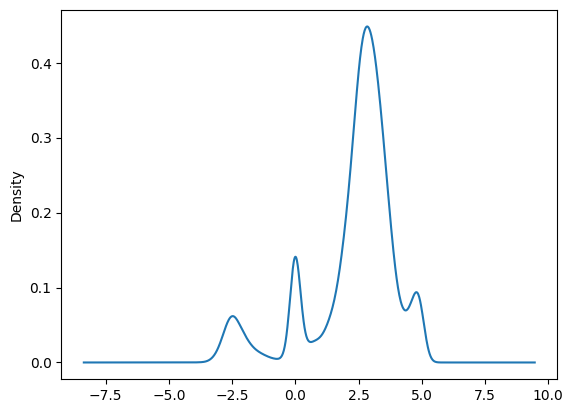

In [ ]:
train_df['log_balance'].plot(kind='kde')

In [ ]:
np.isfinite(train_df['log_balance']).all()

True

In [ ]:
pd.crosstab(train_df['was_contacted'],train_df['target'],normalize='columns')*100

target,no,yes
was_contacted,,
False,80.038342,46.782221
True,19.961658,53.217779


In [ ]:
df.isna().sum()

,0
age,0
job,288
marital,0
education,1857
default,0
housing,0
loan,0
contact,13020
duration,0
campaign,0


# Pipelines

In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

knn_pipeline = Pipeline([
    ('encode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
    ('imputing', KNNImputer(n_neighbors=5))
])

# One-hot encoding with most frequent imputation
cat_oh = Pipeline([
    ('imputing', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Median imputation and scaling for numerical columns
num_pipeline = Pipeline([
    ('imputing', SimpleImputer(strategy='median')),
    ('scaling', StandardScaler())
])


# Train Test Split

In [ ]:
# l is the no of rows in the training Dataset
l=train_df.shape[0]
l
#Removing the Target Column from the Dataset
y_train=train_df['target']
df.drop(columns=['target'],inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df.iloc[:l],y_train.iloc[:l],test_size=0.2)
X_train.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,previous,poutcome,last contact year,last contact month,was_contacted,log_balance
27346,below 75,admin.,married,secondary,no,yes,no,cellular,222,4,1,failure,2008,5,True,2.595496
22448,below 75,NaN,married,NaN,no,no,no,cellular,464,1,6,failure,2010,7,True,2.747412
25091,below 75,admin.,married,secondary,no,yes,no,telephone,18,6,11,failure,2010,5,True,2.082785
19216,below 75,unemployed,single,secondary,no,yes,no,cellular,4470,53,58,failure,2010,12,True,4.844316
5943,below 75,management,married,secondary,no,yes,no,cellular,734,4,0,not contacted,2010,8,False,2.659916


# Column Transformer


#####  New Columns after Transformation

In [ ]:
X_train.isna().sum()

,0
age,0
job,182
marital,0
education,1152
default,0
housing,0
loan,0
contact,8315
duration,0
campaign,0


In [ ]:
# Define Columns
knn_columns = ['poutcome', 'contact', 'marital', 'default', 'housing', 'loan']
num_columns = ['duration', 'log_balance', 'campaign', 'previous']
oh_columns = ['job', 'education', 'last contact year', 'last contact month','age','was_contacted']
preprocessor = ColumnTransformer(
    transformers=[
        ('knn', knn_pipeline, knn_columns),
        ('num', num_pipeline, num_columns),
        ('onehot', cat_oh, oh_columns)
    ],
    remainder='passthrough'
)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
test=preprocessor.transform(df.iloc[l:])

##### Labelling Binary Columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(['yes', 'no'])
Y_test = label_encoder.transform(Y_test)
print("Transformed Y_test:", Y_test)

Transformed Y_test: [0 0 0 ... 1 1 0]


In [ ]:
# X_train = X_train[:, :-1]
# X_train

# SMOTE (Handling Imbalanced Dataset)

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_train,Y_train=smote.fit_resample(X_train,Y_train)

#  Feature Selection

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
selector = RFE(estimator=DecisionTreeClassifier(),n_features_to_select=32)
X_train = selector.fit_transform(X_train,Y_train)
X_test=selector.transform(X_test)
test=selector.transform(test)
X_train.shape


(53380, 32)

In [ ]:
test.shape

(10000, 32)

# Training the model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score, recall_score, f1_score, roc_auc_score,roc_curve

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

models = {
    'Logistic Regression': LogisticRegression(),
    'SGD Classifier': SGDClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    'XGb': XGBClassifier(),
}

# Number of cross-validation folds
cv_folds = 5

for model_name, model in models.items():
    print(model_name)

    # Perform cross-validation predictions on training and test sets
    y_train_pred = cross_val_predict(model, X_train, Y_train, cv=cv_folds)
    y_test_pred = cross_val_predict(model, X_test, Y_test, cv=cv_folds)

    # Calculate metrics for training set
    model_train_accuracy = accuracy_score(Y_train, y_train_pred)
    model_train_f1 = f1_score(Y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(Y_train, y_train_pred, pos_label=1)
    model_train_recall = recall_score(Y_train, y_train_pred, pos_label=1)
    model_train_rocauc_score = roc_auc_score(Y_train, y_train_pred)

    # Calculate metrics for test set
    model_test_accuracy = accuracy_score(Y_test, y_test_pred)
    model_test_f1 = f1_score(Y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(Y_test, y_test_pred, pos_label=1)
    model_test_recall = recall_score(Y_test, y_test_pred, pos_label=1)
    model_test_rocauc_score = roc_auc_score(Y_test, y_test_pred)

    # Print model performance
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
    print('----------------------------------')
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
    print('=' * 35)
    print('\n')


Logistic Regression
Model performance for Training set
- Accuracy: 0.7881
- F1 score: 0.7875
- Precision: 0.8236
- Recall: 0.7333
- Roc Auc Score: 0.7881
----------------------------------
Model performance for Test set
- Accuracy: 0.8532
- F1 score: 0.8232
- Precision: 0.4976
- Recall: 0.1836
- Roc Auc Score: 0.5759


SGD Classifier
Model performance for Training set
- Accuracy: 0.8118
- F1 score: 0.8118
- Precision: 0.8129
- Recall: 0.8100
- Roc Auc Score: 0.8118
----------------------------------
Model performance for Test set
- Accuracy: 0.8580
- F1 score: 0.8172
- Precision: 0.5686
- Recall: 0.1262
- Roc Auc Score: 0.5549


Decision Tree
Model performance for Training set
- Accuracy: 0.8754
- F1 score: 0.8754
- Precision: 0.8772
- Recall: 0.8731
- Roc Auc Score: 0.8754
----------------------------------
Model performance for Test set
- Accuracy: 0.8316
- F1 score: 0.8324
- Precision: 0.4270
- Recall: 0.4378
- Roc Auc Score: 0.6685


Random Forest
Model performance for Training set

# HyperParameter Tuning The Model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Define pipelines for each model
pipeline_xgb = Pipeline([
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))  # XGBoost
])

pipeline_gb = Pipeline([
    ('model', GradientBoostingClassifier())  # Gradient Boosting
])

# Define parameter grids for each model
param_grid_xgb = {
    'model__n_estimators': [100, 200, 300, 500],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__max_depth': [3, 5, 7, 10],
    'model__min_child_weight': [1, 3, 5],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
}

param_grid_gb = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [3, 5, 7],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 5],
    'model__subsample': [0.6, 0.8, 1.0],
}

# Set up RandomizedSearchCV for both pipelines
random_search_xgb = RandomizedSearchCV(
    pipeline_xgb,
    param_distributions=param_grid_xgb,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_gb = RandomizedSearchCV(
    pipeline_gb,
    param_distributions=param_grid_gb,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

Perform RandomizedSearchCV for each model
print("Tuning XGBoost...")
random_search_xgb.fit(X_train, Y_train)
print(f"Best XGBoost params: {random_search_xgb.best_params_}")
print(f"Best XGBoost score: {random_search_xgb.best_score_}")

print("Tuning Gradient Boosting...")
random_search_gb.fit(X_train, Y_train)
print(f"Best Gradient Boosting params: {random_search_gb.best_params_}")
print(f"Best Gradient Boosting score: {random_search_gb.best_score_}")

# Determine the best model
if random_search_xgb.best_score_ > random_search_gb.best_score_:
    print("XGBoost is the better model.")
    best_model = random_search_xgb.best_estimator_
else:
    print("Gradient Boosting is the better model.")
    best_model = random_search_gb.best_estimator_

Test the best model on the test set
accuracy = best_model.score(X_test, Y_test)
print(f"Test accuracy of the best model: {accuracy}")
print(random_search_gb.best_estimator_,random_search_gb.best_score_)

Tuning Gradient Boosting...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Gradient Boosting params: {'model__subsample': 0.6, 'model__n_estimators': 300, 'model__min_samples_split': 5, 'model__min_samples_leaf': 5, 'model__max_depth': 7, 'model__learning_rate': 0.01}
Best Gradient Boosting score: 0.8853506845921396
Pipeline(steps=[('model',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=7,
                                            min_samples_leaf=5,
                                            min_samples_split=5,
                                            n_estimators=300, subsample=0.6))]) 0.8853506845921396


# Submission

***By Model Training We can Use Gradient Boost Because of better Accuracy***

In [ ]:
model=GradientBoostingClassifier().fit(X_train,Y_train)
Y_pred=model.predict(test)

In [ ]:
test=pd.read_csv(r'/content/test.csv')

In [ ]:
y_pred = np.where(Y_pred==1, 'yes', 'no')
predictions_df = pd.DataFrame({
    'id': test.index,
    'target': y_pred
})
predictions_df.to_csv('submission.csv', index=False)